# Prerequisites

If running locally, here is the list of modules that you need: jupyter, matplotlib, numpy, pandas, scipy, scikit-learn

One way to install them is running this command:
```
python3 -m pip install -U jupyter matplotlib numpy pandas scipy scikit-learn
```

The flag "U" upgrades all specified packages to the newest.

In VScode, you can install the extension "Code Spell Checker" to help you avoid typos in your markdown cells.

# Introduction

We want to use California census data to build a Linear Regression model of housing prices in the state. This data includes several metrics for each district (a district typically has a population of 600 to 3000 people). The model should learn from this data and be able to predict the median housing price in any district, given all the other metrics. The data that we use in this practice is not recent, but no harm in pretending it so.

What is your target? Median housing price.

Is this task going to be a supervised learning or otherwise? Supervised.

# Load data and take a sneak peek

In [1]:
#
import pandas as pd
housing = pd.read_csv('Lab_1_data.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Now, you are seeing the different attributes that are present in the data. Each row represents one district in California. Now, let's use the ```info()``` method to get a brief description of the data:

In [2]:
#
housing.info(verbose=True, memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can now see information such as total number of rows, attributes' types, and number of nonnull values. Notice that the "total_bedrooms" attribute has 20433 nonnull values while we see a total of 20640 data entries. This means that 207 (20640-20433=207) rows (i.e., districts) are missing this feature. We will take care of these rows later.

We also notice that all attributes are numerical, except "ocean_proximity" that is "object", so it could hold any kind of Python object. When you used `head()` method, you probably noticed that the values in the "ocean_proximity" column were repetitive, which means that it is probably a categorical attribute. Now, let's figure out what categories exist and how many districts belong to each category by using the `value_counts()` method:

In [3]:
#
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

We can also use the `describe()` method to get a statistical summary of the numerical attributes:

In [4]:
#
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The rows "count", "mean", "min", and "max" are self-explanatory. Note that the method `describe` ignores null values and that's why the "count" of "total_bedrooms" is 20,433, and not 20,640). "std" row shows the standard deviation, which measures how dispersed the values are. The 25%, 50%, and 75% rows show the corresponding percentiles.

Recap: A percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a "housing_median_age" lower than 18, while 50% are lower than 29, and 75% are lower than 37. These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third quartile).

Another quick way to get a feel of the data you are dealing with is to plot a histogram for each numerical attribute.

Recap: A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot one attribute at a time, or you can call the `hist()` method on the whole dataset and it will plot a histogram for each numerical attribute:

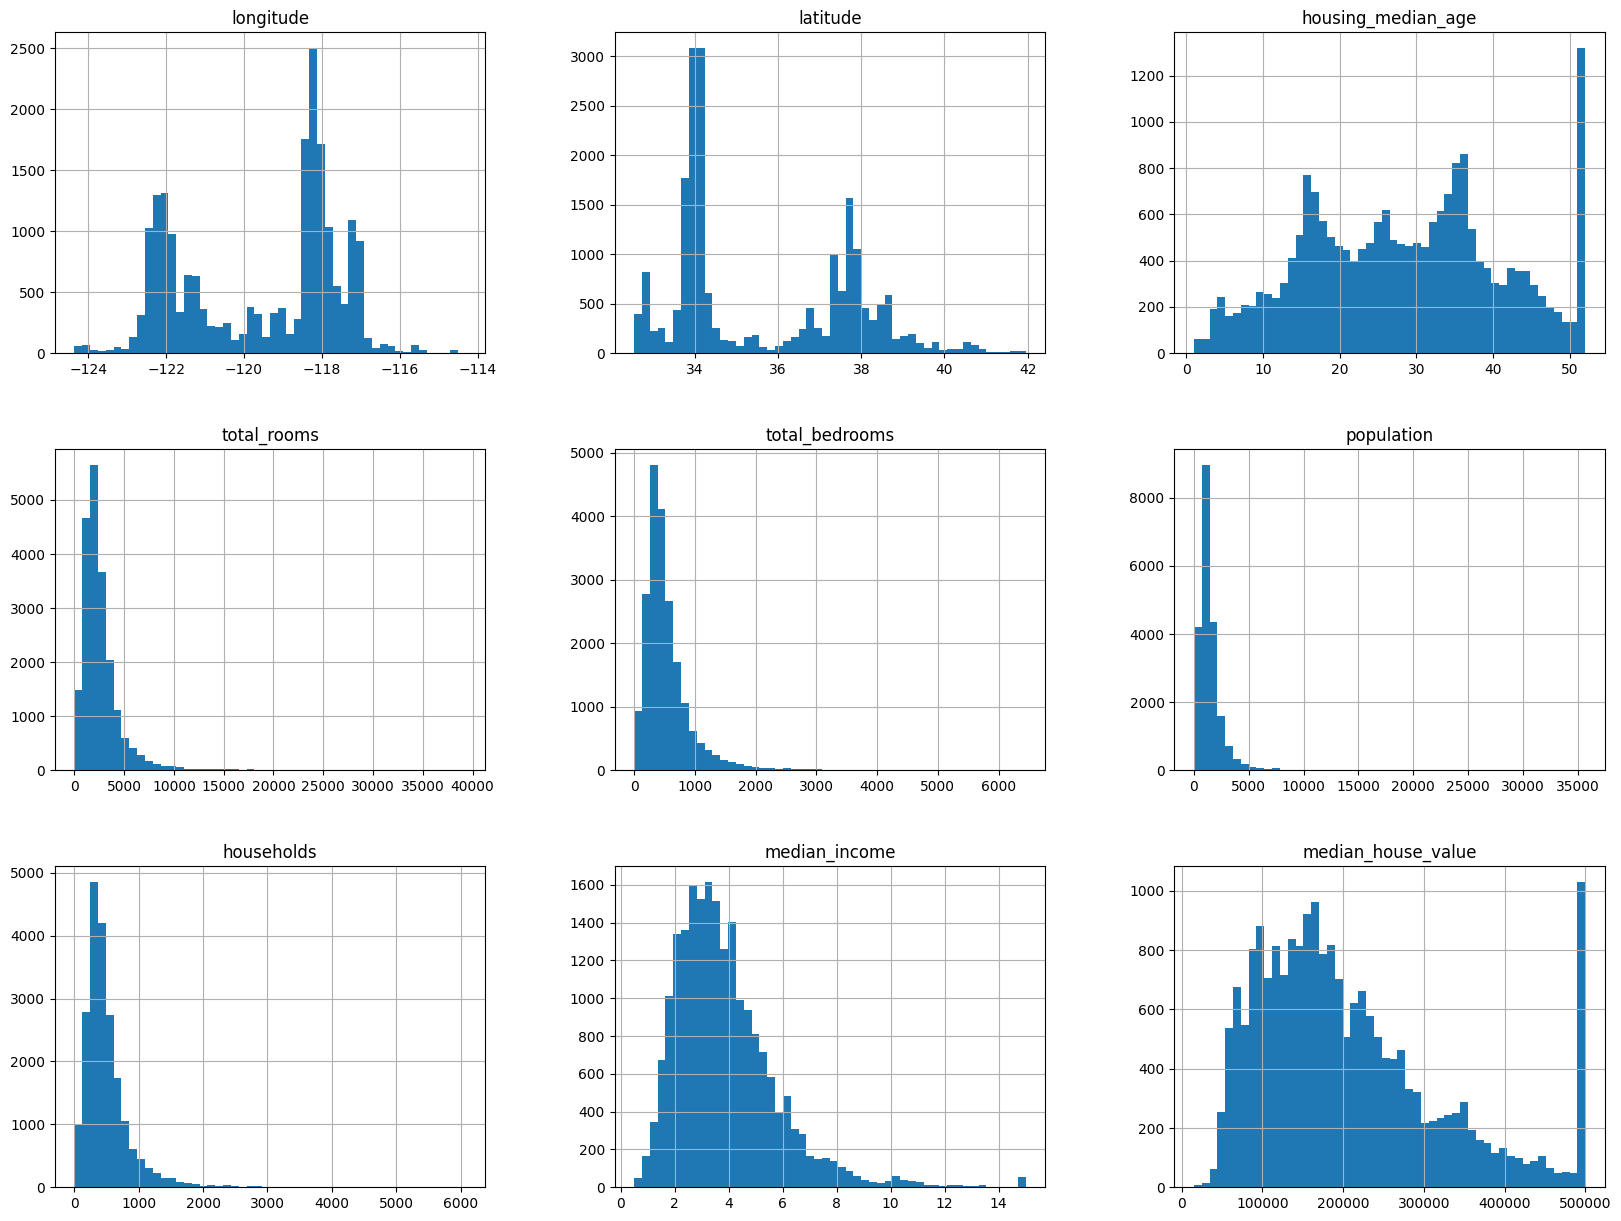

In [5]:
#
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

Now you should carefully investigate every histogram tile and try to derive insights. A few example insights:
- The median income attribute does not look like it is expressed in dollars. You inquire into it and you are told that the data has been scaled and capped at 15 for higher median incomes, and at 0.5 for lower median incomes. For example, 3 actually means about $30,000. So, in this case, you are dealing with a preprocessed attribute. Data preprocessing is a common practice in data science and not necessarily a problem. But you should try to catch things like this, inquire into them, and make sure that your understanding of the data is correct.

- You are also told the housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute. Your ML algorithm may learn that prices never go beyond that limit. You need to check with the team that will use your model’s output to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500000, then you have two options:

  1. Collect proper labels for the districts whose labels were capped.

  2. Remove those districts from the date. Note that eliminating those does not count as *dimensionality reduction*, because you are dropping data points - and not features.

- The attributes have very different scales suggesting feature scaling.
- Many of the histograms extend much farther to the right of the median than to the left. This may make it harder for your ML algorithms to detect patterns. Perhaps we should consider transforming these attributes to have more bell-shaped distributions.

# Split the data into training and test set

Pick randomly 20% (or less if your dataset is very large) of the dataset instances and set them aside. This subset will be your test set and the rest will be your training set.

Note that we set the random number generator’s seed before running the splitter, so that it always generates the same shuffled indices.

In [6]:
#
from sklearn.model_selection import train_test_split
seed = 2835
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=seed)
print(len(train_set))
print(len(test_set))

16512
4128


We did a purely random sampling. This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. When a survey company decides to call 1000 people to ask them a few questions, they don’t just pick 1000 people randomly in a phone book. They try to ensure that these 1000 people are representative of the whole population. For example, the US population is 51.3% females and 48.7% males, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called __stratified sampling__: the population is divided into homogeneous subgroups called __strata__, and the right number of instances are sampled from each __stratum__ to guarantee that the test set is representative of the overall population. If the people running the survey used purely random sampling, there would be about a 12% chance of sampling a skewed test set that was either less than 49% female or more than 54% female. Either way, the survey results would be significantly biased.

Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute. Let’s look at the median income histogram more closely:

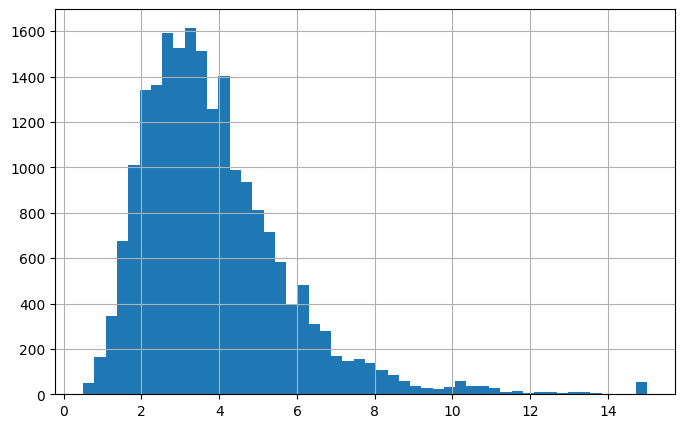

In [7]:
#
housing.median_income.hist(bins=50, figsize=(8,5))
plt.show()

We observe that most median income values are clustered around 1.5 to 6 (i.e., $15000–$60000), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, otherwise the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. Let's use the `pd.cut()` function to create an income category attribute with five categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15000), category 2 from 1.5 to 3, and so on:

In [8]:
#
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

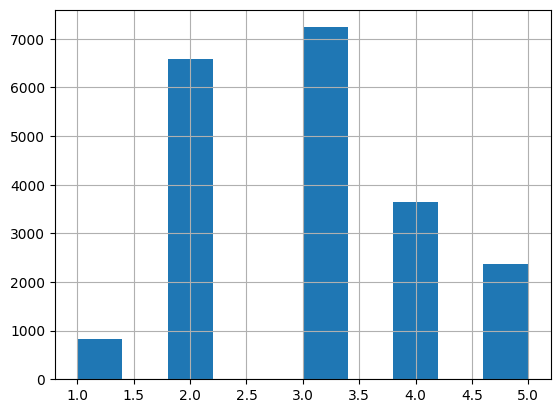

In [9]:
#
housing["income_cat"].hist()
plt.show()

We are now ready to do stratified sampling based on the income category that we just created. For this we can use Scikit-Learn’s `StratifiedShuffleSplit` class:

In [10]:
#
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=seed)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Let’s see if this worked as expected. You can start by looking at the income category proportions in the test set:

In [11]:
#
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

Let's compare the income category proportions in the full dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling.

In [12]:
#
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=seed)

compare_props = pd.DataFrame({
    "Full": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Full"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Full"] - 100

compare_props

,Full,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.043362,8.880779,0.364964
2,0.318847,0.318798,0.324855,1.884212,-0.015195
3,0.350581,0.350533,0.351017,0.124378,-0.013820
4,0.176308,0.176357,0.169331,-3.957131,0.027480
5,0.114438,0.114341,0.111434,-2.624894,-0.084674


As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

Now let's remove the "income_cat" attribute so the data is back to its original state:

In [13]:
#
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Gain more insights

Let’s create a copy of our stratified training set so that we can play with it without harm:

In [14]:
#
housing = strat_train_set.copy()

Since the data includes geographical information (latitude and longitude), it is a good idea to visualize the data for all districts using scatter plot:

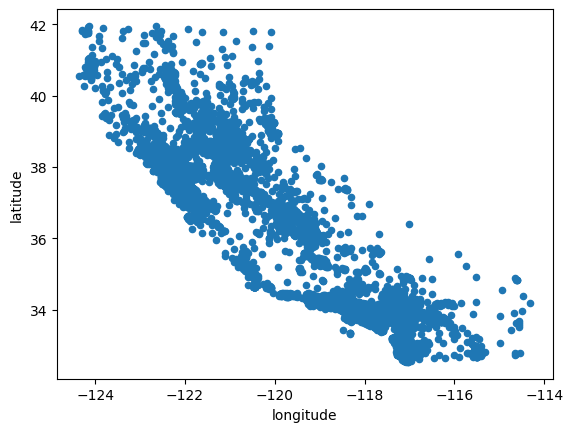

In [15]:
#
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

But it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points:

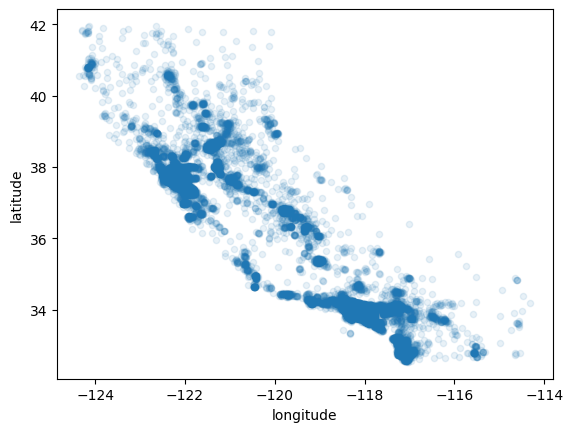

In [16]:
#
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

Now you can clearly see the high-density areas, like the Bay Area. Our brains are very good at spotting patterns in pictures, but you may need to play around with visualization parameters to make the patterns stand out or more pronounced.

Now let’s look at the housing prices. The radius of each circle represents the district’s population (option `s`), and the color represents the price (option `c`). We will use a predefined color map (option `cmap`) called jet , which ranges from blue (low values) to red (high prices):

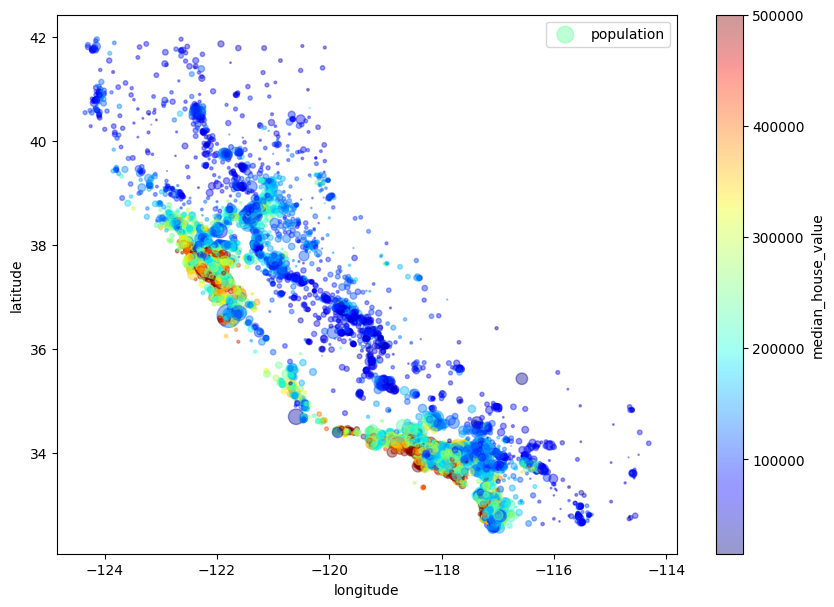

In [17]:
#
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

plt.legend()
plt.show()

This image tells you that the housing prices are very much related to the location (for example close to the ocean) and to the population density, as you probably knew already. A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers (*i.e.*, example of feature extraction using unsupervised techniques).

# Let's find correlations

We can compute the Pearson’s Correlation Coefficient (PCC, or Pearson’s r) to measure linear correlation measure between every pair of attributes using the `corr()` method; and see how much each attribute correlates with the median house value (*i.e.*, target):

In [18]:
#
corr_matrix = housing.select_dtypes('number').corr()
corr_matrix["median_house_value"].sort_values(ascending=False)[1:]

median_income         0.686583
total_rooms           0.129061
housing_median_age    0.110075
households            0.061547
total_bedrooms        0.045269
population           -0.026237
longitude            -0.046097
latitude             -0.144567
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to 0 mean that there is no **linear** correlation. The correlation coefficient only measures linear correlations and it may completely miss out on nonlinear relationships.

There are different methods to measure nonlinear correlation, one of them being [MIC](https://en.wikipedia.org/wiki/Maximal_information_coefficient).

Another way to check for correlation between attributes is to use the pandas `scatter_matrix()` function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, we would get 11*11 = 121 plots, which would not fit on a page. So, let’s just focus on a few promising
attributes that seem most correlated with the median housing value:

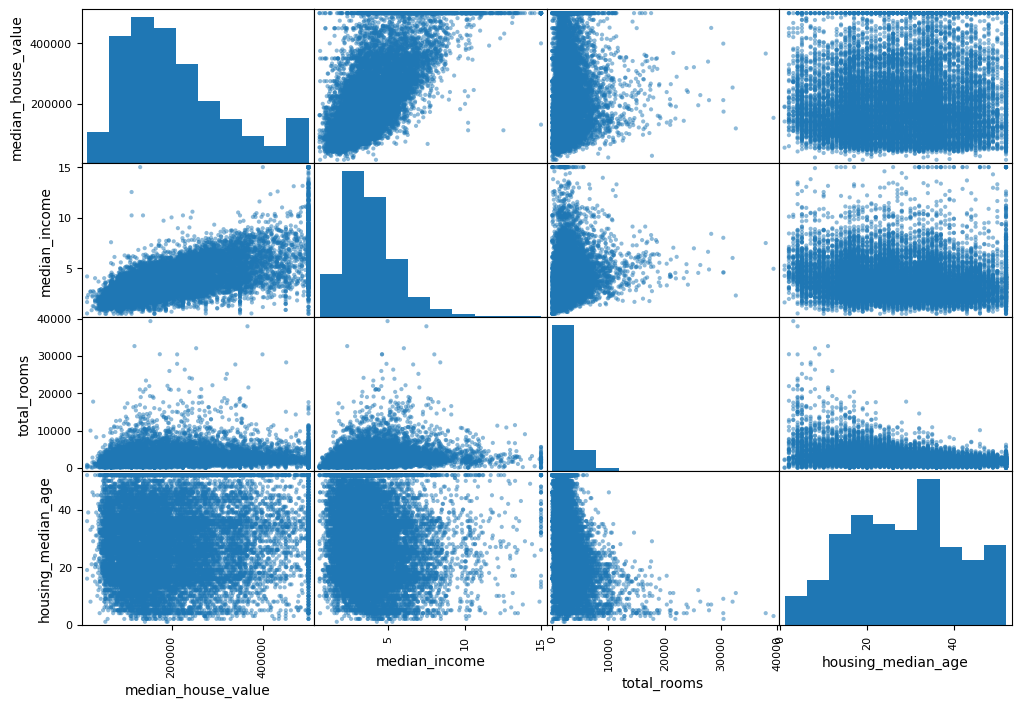

In [19]:
#
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

Note that the main diagonal (top left to bottom right) does not show correlation tiles, instead it is where pandas displays a histogram of each attribute. We saw in the correlation matrix also in these correlation tiles that the most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatter plot:

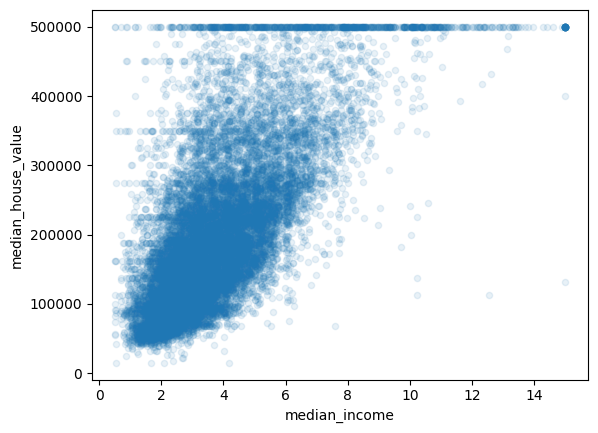

In [20]:
#
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)
plt.show()

This plot reveals a few things. First, the correlation is indeed very strong; you can clearly see the upward trend, and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at $500000. But this plot reveals other less obvious straight lines: a horizontal line around $450000, another around $350000, perhaps one around $280000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

# Experiment with attribute combinations

One last thing you may want to do before preparing the data for your ML is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. Let’s create these new attributes:

In [21]:
#
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

And now let’s look at the correlation matrix again:

In [22]:
#
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)[1:]

/tmp/ipykernel_135874/2094188486.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_income               0.686583
rooms_per_household         0.146515
total_rooms                 0.129061
housing_median_age          0.110075
households                  0.061547
total_bedrooms              0.045269
population_per_household   -0.021831
population                 -0.026237
longitude                  -0.046097
latitude                   -0.144567
bedrooms_per_room          -0.256154
Name: median_house_value, dtype: float64

The new "bedrooms_per_room" attribute is much more correlated with the median house value than the total number of rooms or bedrooms. The number of rooms per household is also more informative than the total number of rooms in a district.

# Prepare the data for ML

First let’s revert to a clean training set (by copying "strat_train_set" once again). Let’s also separate the predictors and the labels, since we don’t necessarily want to apply the same transformations to the predictors and the target values:

In [23]:
#
housing = strat_train_set.drop("median_house_value", axis=1)  
housing_labels = strat_train_set["median_house_value"].copy() 

# Data cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s take care of them. We saw earlier that the "total_bedrooms" attribute has some missing values, so let’s fix this. We have three options:
   - Get rid of the corresponding districts
   - Get rid of the whole attribute
   - Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s `dropna()` , `drop()` , and `fillna()` methods:

In [24]:
# option 1:
# housing.dropna(subset=["total_bedrooms"])

# option 2:
# housing.drop("total_bedrooms", axis=1)

# option 3:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

Scikit-Learn also provides a handy class to take care of missing values: `SimpleImputer`. First, you need to create a `SimpleImputer` instance, specifying that you want to replace each attribute’s missing values with the median of that attribute. Since the median can only be computed on numerical attributes, you need to create a
copy of the data without the text attribute "ocean_proximity". Then, you can fit the imputer instance to the training data using the `fit()` method:

In [25]:
#
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

Note that any object that can estimate some parameters based on a dataset is called an estimator (e.g., an imputer is an estimator). All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., imputer.strategy), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., imputer.statistics_).

In [26]:
#
print(imputer.strategy)
imputer.statistics_

median


array([-118.49   ,   34.25   ,   29.     , 2131.     ,  437.     ,
       1169.     ,  410.     ,    3.53875])

In [27]:
#
housing_num.median().values

array([-118.49   ,   34.25   ,   29.     , 2131.     ,  437.     ,
       1169.     ,  410.     ,    3.53875])

Now you can use this "trained" imputer to transform the training set by replacing missing values with the learned medians and the result is a plain NumPy array containing the transformed features:

In [28]:
#
X = imputer.transform(housing_num)

And, you can put it back into a pandas DataFrame:

In [29]:
#
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1276,-121.60,37.91,13.0,2479.0,394.0,1075.0,350.0,5.1017
8695,-118.34,33.86,36.0,2223.0,360.0,1162.0,376.0,5.2590
9784,-121.39,36.16,28.0,1057.0,249.0,288.0,130.0,3.0526
713,-122.09,37.67,48.0,1252.0,305.0,673.0,308.0,2.3357
8982,-118.43,34.00,37.0,1340.0,358.0,1008.0,340.0,3.7614


# Handling text and categorical attributes

In this dataset, there is only one text attribute that is the "ocean_proximity". Let’s look at its value for the first 10 instances:

In [30]:
#
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(n=10)

,ocean_proximity
1276,INLAND
8695,<1H OCEAN
9784,NEAR OCEAN
713,NEAR BAY
8982,<1H OCEAN
2584,NEAR OCEAN
12769,INLAND
10671,<1H OCEAN
20257,NEAR OCEAN
8711,<1H OCEAN


It’s not arbitrary text and there are a limited number of possible values, each of which represents a category. So this attribute is a categorical attribute. Most Machine Learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers (i.e. encoding). For this, we can use Scikit-Learn’s `OrdinalEncoder` class:

In [31]:
#
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [0.],
       [4.],
       [3.],
       [0.],
       [4.],
       [1.],
       [0.],
       [4.],
       [0.]])

You can get the list of categories using the `categories_` instance variable. It is a list containing a 1D array of categories for each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute):

In [32]:
#
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as "bad," "average," "good," and "excellent"), but it is obviously not the case for the "ocean_proximity" column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the category is "INLAND" (and 0 otherwise), and so on. This is called *one-hot* encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. Scikit-Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors:

In [33]:
#
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. Sparse matrix only stores the location of the nonzero elements, saving memory and computation. However, you can convert it to a NumPy array if you wish:

In [34]:
#
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

And again, you can get the list of categories using the encoder’s `categories_` instance variable:

In [35]:
#
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Transformation

Some estimators (such as an imputer) can also transform a dataset; these are called transformers. The transformation is performed by the `transform()` method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for an imputer. All transformers also have a convenience method called `fit_transform()` that is equivalent to calling `fit()` and then `transform()` (but sometimes
`fit_transform()` is optimized and runs much faster).

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15.

There are two common ways to get all attributes to have the same scale: *min-max* scaling and *standardization*.

- Min-max scaling (many people call this normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called `MinMaxScaler` for this. It has a `feature_range` hyperparameter that lets you change the range if, for some reason, you don’t want 0–1.
  
- Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called `StandardScaler` for standardization.

Fortunately, Scikit-Learn provides the `Pipeline` class to help you execute many data transformation steps in the right order. However, for tasks such as custom cleanup operations or combining specific attributes, you will need to write your own transformer. You will want your custom transformer to work seamlessly with Scikit-Learn functionalities (such as `Pipelines`), and since Scikit-Learn relies on duck typing (not inheritance), all you need to do is create a class and implement three methods: `fit()` (returning self), `transform()`, and `fit_transform()`.

You can get the last one for free by simply adding `TransformerMixin` as a base class. If you add `BaseEstimator` as a base class, you will also get two extra methods (`get_params()` and `set_params()`) that will be useful for automatic hyperparameter tuning.

For example, here is a small transformer class that adds the combined attributes we discussed earlier:

In [36]:
#
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

housing_extra_attribs

array([[-121.6, 37.91, 13.0, ..., 'INLAND', 7.082857142857143,
        3.0714285714285716],
       [-118.34, 33.86, 36.0, ..., '<1H OCEAN', 5.912234042553192,
        3.0904255319148937],
       [-121.39, 36.16, 28.0, ..., 'NEAR OCEAN', 8.13076923076923,
        2.2153846153846155],
       ...,
       [-117.24, 33.0, 16.0, ..., 'NEAR OCEAN', 7.11614730878187,
        2.2521246458923514],
       [-122.47, 37.76, 52.0, ..., 'NEAR BAY', 3.758765778401122,
        2.225806451612903],
       [-122.14, 37.7, 17.0, ..., 'NEAR BAY', 4.433333333333334,
        2.106060606060606]], dtype=object)

We just saw that "housing_extra_attribs" is a NumPy array, we've lost the column names (unfortunately, that's a problem with Scikit-Learn). To recover a dataFrame, we run:

In [37]:
#
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
1276,-121.6,37.91,13.0,2479.0,394.0,1075.0,350.0,5.1017,INLAND,7.082857,3.071429
8695,-118.34,33.86,36.0,2223.0,360.0,1162.0,376.0,5.259,<1H OCEAN,5.912234,3.090426
9784,-121.39,36.16,28.0,1057.0,249.0,288.0,130.0,3.0526,NEAR OCEAN,8.130769,2.215385
713,-122.09,37.67,48.0,1252.0,305.0,673.0,308.0,2.3357,NEAR BAY,4.064935,2.185065
8982,-118.43,34.0,37.0,1340.0,358.0,1008.0,340.0,3.7614,<1H OCEAN,3.941176,2.964706


We can now use Scikit-Learn's `Pipeline` to group our custom transformer along with the standard ones (i.e. the scalers) to be executed in the right order:

In [38]:
#
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [39]:
#
housing_num_tr

array([[-1.02025198e+00,  1.07361430e+00, -1.24155694e+00, ...,
         6.52921001e-01, -2.00050665e-03, -8.33229194e-01],
       [ 6.10412106e-01, -8.26049729e-01,  5.86666802e-01, ...,
         1.91234225e-01, -3.61970032e-04, -7.87732462e-01],
       [-9.15209199e-01,  2.52771818e-01, -4.92371094e-02, ...,
         1.06621129e+00, -7.58364956e-02,  3.25826677e-01],
       ...,
       [ 1.16063618e+00, -1.22943518e+00, -1.00309298e+00, ...,
         6.66050445e-01, -7.26675736e-02, -1.09359197e+00],
       [-1.45542920e+00,  1.00325637e+00,  1.85847462e+00, ...,
        -6.58080830e-01, -7.49375855e-02,  9.39056251e-01],
       [-1.29036198e+00,  9.75113201e-01, -9.23604987e-01, ...,
        -3.92035405e-01, -8.52659721e-02, -2.18369247e-01]])

We've handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column. Scikit-Learn has the `ColumnTransformer` for this purpose that works great with pandas DataFrames. Let’s use it to apply all the transformations to the housing data:

In [40]:
#
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

# Note that we construct a ColumnTransformer. The constructor requires a list of tuples, where each tuple contains a
# name, a transformer, and a list of names (or indices) of columns that the transformer should be applied to.
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Finally, we apply this ColumnTransformer to the housing data: it applies each transformer to the appropriate columns
# and concatenates the outputs along the second axis (the transformers must return the same number of rows).
housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared

array([[-1.02025198,  1.0736143 , -1.24155694, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.61041211, -0.82604973,  0.5866668 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.9152092 ,  0.25277182, -0.04923711, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.16063618, -1.22943518, -1.00309298, ...,  0.        ,
         0.        ,  1.        ],
       [-1.4554292 ,  1.00325637,  1.85847462, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29036198,  0.9751132 , -0.92360499, ...,  0.        ,
         1.        ,  0.        ]])

In [41]:
#
housing_prepared.shape

(16512, 16)

Note that the `OneHotEncoder` returns a sparse matrix, while the `num_pipeline` returns a dense matrix. When there is such a mix of sparse and dense matrices, the `ColumnTransformer` estimates the density of the final matrix and it returns a sparse matrix if the density is lower than a given threshold (by default, `sparse_threshold=0.3`). In this example, it returns a dense matrix. And that’s it! We have a preprocessing pipeline that takes the full housing data and applies
the appropriate transformations to each column.

# Select and train a model
We are now ready to select and train a Machine Learning model. 
Thanks to all the previous steps, things are now going to be much simpler than you might think. Now, let’s train a Linear Regression model.

In [42]:
#
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

You now have a working Linear Regression model. Let’s try it out on a few instances from the training set. First extract the instances:

In [43]:
#
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

and try the model on the instances:

In [44]:
#
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [199975.55624364 281331.44482537 236329.36197313 197213.18436074
 234881.79590956]


and compare against the actual values:

In [45]:
#
print("Labels:", list(some_labels))

Labels: [241400.0, 279400.0, 146900.0, 175000.0, 314300.0]


It works, though the predictions are not accurate. Let’s the RMSE of our model on the whole training set using Scikit-Learn’s `mean_squared_error()` function:

In [46]:
#
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68532.8938715071